<a href="https://colab.research.google.com/github/u1y2k3t4/Codec1/blob/main/Alfido1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas numpy matplotlib scikit-learn yfinance


/tmp/ipython-input-3-324316433.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


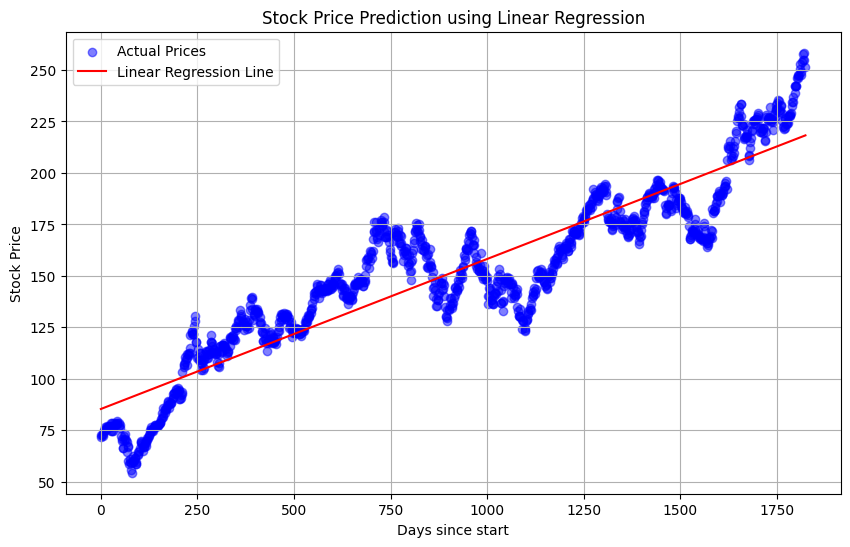

Mean Squared Error: 263.3442187911706


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Download historical data
def fetch_data(stock_symbol, start='2020-01-01', end='2024-12-31'):
    df = yf.download(stock_symbol, start=start, end=end)
    df = df[['Close']]
    df.reset_index(inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df['Days'] = (df['Date'] - df['Date'].min()).dt.days
    return df

# Step 2: Prepare data for regression
def prepare_data(df):
    X = df[['Days']]  # feature
    y = df['Close']   # target
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Step 4: Predict and plot
def predict_and_plot(model, df, X_test, y_test):
    y_pred = model.predict(X_test)

    # Plot
    plt.figure(figsize=(10,6))
    plt.scatter(df['Days'], df['Close'], label="Actual Prices", color='blue', alpha=0.5)
    plt.plot(df['Days'], model.predict(df[['Days']]), label="Linear Regression Line", color='red')
    plt.xlabel("Days since start")
    plt.ylabel("Stock Price")
    plt.title("Stock Price Prediction using Linear Regression")
    plt.legend()
    plt.grid(True)
    plt.show()

    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


# Main driver
if __name__ == "__main__":
    stock_symbol = 'AAPL'  # Change to any stock like 'MSFT', 'GOOG', etc.
    df = fetch_data(stock_symbol)
    X_train, X_test, y_train, y_test = prepare_data(df)
    model = train_model(X_train, y_train)
    predict_and_plot(model, df, X_test, y_test)
